### Understanding Vectors: From Fundamentals to Computation

#### What Are Vectors?

At their core, vectors are mathematical objects that possess both magnitude (size) and direction. While this might seem abstract, vectors appear in many contexts in our daily lives. For instance, when you travel 5 kilometers northeast, you're essentially describing a vector - the magnitude is 5 kilometers, and the direction is northeast.

In mathematics, we typically represent vectors using arrows drawn from an origin point. The length of the arrow indicates the magnitude, while the way the arrow points shows the direction. In computational contexts, we write vectors as ordered lists of numbers called components.

For example, in two dimensions, a vector might be written as:

$$\vec{v} = (3, 4)$$

This means go 3 units in the x-direction (horizontally) and 4 units in the y-direction (vertically).

#### Vector Notation and Representation

Vectors can be denoted in several ways:
- With an arrow above the symbol: $\vec{v}$
- In bold: $\mathbf{v}$
- With underline: $\underline{v}$

When working with vectors in different dimensions:
- A 2D vector has two components: $\vec{v} = (v_1, v_2)$
- A 3D vector has three components: $\vec{v} = (v_1, v_2, v_3)$
- An n-dimensional vector has n components: $\vec{v} = (v_1, v_2, ..., v_n)$


### Basic Vector Operations

Let's explore some fundamental operations with vectors:

1. **Vector Addition**: When we add two vectors, we add their corresponding components:
   $$\vec{v} + \vec{w} = (v_1 + w_1, v_2 + w_2, ..., v_n + w_n)$$

   Geometrically, this is like following one vector and then following the other.

2. **Scalar Multiplication**: When we multiply a vector by a scalar (regular number) c, we multiply each component by c:
   $$c\vec{v} = (c \cdot v_1, c \cdot v_2, ..., c \cdot v_n)$$

   This changes the magnitude of the vector (making it longer or shorter) and potentially reverses its direction (if c is negative).

3. **Dot Product**: The dot product of two vectors gives a scalar:
   $$\vec{v} \cdot \vec{w} = v_1w_1 + v_2w_2 + ... + v_nw_n$$

   The dot product relates to the angle between vectors and has important applications in determining perpendicularity and projections.

#### Vector Spaces Simplified

A vector space is essentially a collection of vectors that you can add together and multiply by scalars, while still remaining in the same collection. The concept might sound complicated, but it's a way of formalizing what kinds of operations we can perform with vectors.

The simplest example is $\mathbb{R}^n$ - the space of all n-dimensional vectors with real number components. For instance, $\mathbb{R}^2$ is the familiar 2D plane, and $\mathbb{R}^3$ is our 3D space.

#### Understanding Span Intuitively

The span of a set of vectors is all the places you can reach by combining these vectors through addition and scalar multiplication. Let me make this concrete:

- The span of a single non-zero vector is a line through the origin.
- The span of two non-parallel vectors in a plane is the entire plane.
- The span of three vectors that don't all lie in the same plane is the entire 3D space.

When we ask if a vector $\vec{t}$ is in the span of vectors $\vec{v}$ and $\vec{w}$, we're asking: "Can I get to $\vec{t}$ by adding scaled versions of $\vec{v}$ and $\vec{w}$?"

#### Working with Vectors in Python

Python makes vector operations straightforward, especially with the NumPy library. Here's how to perform basic vector operations:

In [2]:
import numpy as np

# Creating vectors
v = np.array([1, 2, 1])
w = np.array([3, 1, 2])
t = np.array([5, 7, 5])

# Vector addition
sum_vector = v + w
print("v + w =", sum_vector)

# Scalar multiplication
scaled_v = 2 * v
print("2v =", scaled_v)

# Dot product
dot_product = np.dot(v, w)
print("v · w =", dot_product)


v + w = [4 3 3]
2v = [2 4 2]
v · w = 7


#### Checking if a Vector is in the Span of Others

To determine if vector $\vec{t}$ is in the span of vectors $\vec{v}$ and $\vec{w}$, we need to see if we can find scalars $a$ and $b$ such that:

$$\vec{t} = a\vec{v} + b\vec{w}$$

In Python, we can solve this using NumPy's linear algebra functions:



In [3]:
import numpy as np
from numpy.linalg import solve, lstsq, matrix_rank

def is_in_span(vectors, target):
    """
    Check if target vector is in the span of the given vectors.
    
    Parameters:
    vectors -- list of numpy arrays, the vectors to check span against
    target -- numpy array, the vector to check if it's in the span
    
    Returns:
    bool -- True if target is in the span, False otherwise
    """
    # Convert list of vectors to matrix (each vector is a column)
    A = np.column_stack(vectors)
    
    # Check if the augmented matrix [A|target] has the same rank as A
    # If it does, then target is in the span of the columns of A
    augmented = np.column_stack((A, target))
    
    return matrix_rank(A) == matrix_rank(augmented)

# Example usage
v = np.array([1, 2, 1])
w = np.array([3, 1, 2])
t = np.array([5, 7, 5])

print(f"Is t in the span of v and w? {is_in_span([v, w], t)}")

# Alternative approach: solve the equation directly
def find_coefficients(vectors, target):
    """
    Find coefficients to express target as linear combination of vectors.
    
    Parameters:
    vectors -- list of numpy arrays
    target -- numpy array
    
    Returns:
    numpy array of coefficients, or None if not possible
    """
    A = np.column_stack(vectors)
    
    # Using least squares to handle cases where exact solution might not exist
    coefficients, residuals, rank, s = lstsq(A, target, rcond=None)
    
    # If residuals is close to zero, we have a solution
    if len(residuals) == 0 or np.all(np.abs(residuals) < 1e-10):
        return coefficients
    return None

coeffs = find_coefficients([v, w], t)
if coeffs is not None:
    print(f"t = {coeffs[0]}·v + {coeffs[1]}·w")
    # Verify our result
    reconstruction = coeffs[0] * v + coeffs[1] * w
    print(f"Reconstruction: {reconstruction}")
else:
    print("t is not in the span of v and w")


Is t in the span of v and w? False
t is not in the span of v and w


#### Practical Example: Image Processing

Vectors and spans have practical applications in many fields. For example, in image processing, each image can be represented as a vector (by flattening its pixel values). The span of a set of base images defines the space of images that can be represented as combinations of those base images.

This is the fundamental idea behind techniques like Principal Component Analysis (PCA), which finds the most important directions (vectors) in your data.

#### Visualization with Matplotlib

To better understand vectors and spans, visualization can be tremendously helpful:



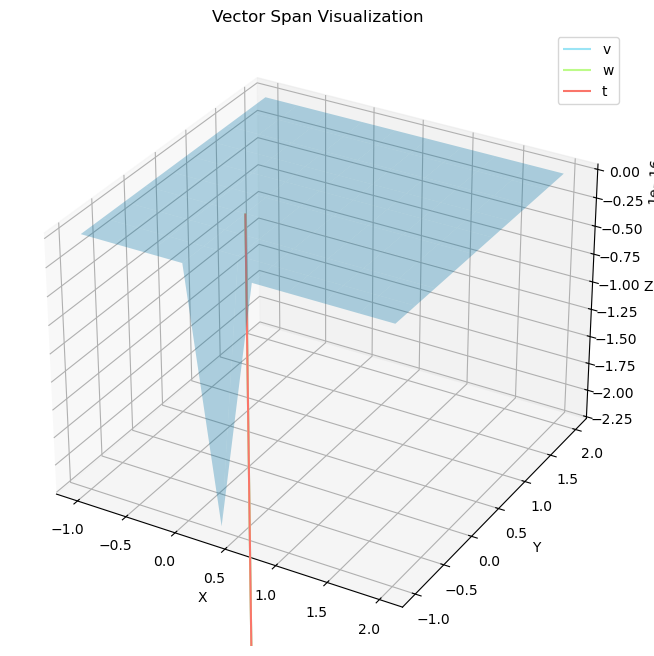

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create vectors
v = np.array([1, 2, 1])
w = np.array([3, 1, 2])
t = np.array([5, 7, 5])

# Find coefficients
coeffs = find_coefficients([v, w], t)

# Create a figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original vectors
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='#9AE4F5', label='v')
ax.quiver(0, 0, 0, w[0], w[1], w[2], color='#BCFB89', label='w')
ax.quiver(0, 0, 0, t[0], t[1], t[2], color='#FA756A', label='t')

# Plot the linear combination
if coeffs is not None:
    reconstruction = coeffs[0] * v + coeffs[1] * w
    ax.quiver(0, 0, 0, reconstruction[0], reconstruction[1], reconstruction[2], 
              color='#FBF266', linestyle='dashed', label='av + bw')

# Create a grid of points in the span of v and w
xx, yy = np.meshgrid(np.linspace(-1, 2, 10), np.linspace(-1, 2, 10))
zz = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        temp_coeffs = find_coefficients([v, w], np.array([xx[i,j], yy[i,j], 0]))
        if temp_coeffs is not None:
            zz[i,j] = temp_coeffs[0] * v[2] + temp_coeffs[1] * w[2]

ax.plot_surface(xx, yy, zz, alpha=0.3, color='#0096D9')

# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.title('Vector Span Visualization')
plt.show()

##### Understanding Vector Spaces Conceptually

The concept of a vector space might seem abstract at first, but I can help you visualize it. A vector space is essentially a mathematical framework that formalizes the idea of vectors and the operations we can perform with them.

#### The Key Insight: Closure Properties

When we say "a collection of vectors that you can add together and multiply by scalars, while still remaining in the same collection," we're describing what mathematicians call "closure properties." Let me explain with a simple example:

Think about the 2D plane (ℝ²). When you add any two vectors in this plane, the result is always another vector in the plane. Similarly, when you multiply any vector in the plane by a scalar (a real number), the result remains in the plane.

Let's visualize this:

```mermaid
graph TD
    A[Vector Space: The 2D Plane] --- B["Vector v = (2,1)"]
    A --- C["Vector w = (1,2)"]
    B --- D["Vector v + w = (3,3)"]
    C --- D
    B --- E["Vector 2v = (4,2)"]
    style A fill:#BCFB89
    style B fill:#9AE4F5
    style C fill:#FBF266
    style D fill:#FA756A
    style E fill:#0096D9
```

This diagram shows that when we add vectors v and w, we get a new vector (v+w) that still lives in our 2D plane. Similarly, when we scale v by 2, we get another vector in the plane.

#### Visual Representation with Linear Combinations

Let's see a more comprehensive visual of what happens with linear combinations in ℝ²:

```mermaid
flowchart TD
    Origin["(0,0)"] --- v["v = (1,2)"]
    Origin --- w["w = (2,1)"]
    Origin --- A["a·v = (2,4)"]
    Origin --- B["b·w = (4,2)"]
    Origin --- C["a·v + b·w = (6,6)"]
    
    style Origin fill:#BCFB89
    style v fill:#9AE4F5
    style w fill:#FBF266
    style A fill:#FA756A
    style B fill:#0096D9
    style C fill:#FCEB14
```

In this example, we start with two vectors v and w. When we scale them by constants (a=2, b=2) and add them together, we get a new vector that is still in our 2D plane.

#### Concrete Example: Spanning the Plane

Consider two non-parallel vectors in ℝ². Their span (all possible linear combinations) covers the entire plane—which is itself a vector space!

```mermaid
graph TD
    Origin["Origin (0,0)"] --- v["v = (1,0)"]
    Origin --- w["w = (0,1)"]
    Origin --- Point1["(1,1) = 1·v + 1·w"]
    Origin --- Point2["(2,1) = 2·v + 1·w"]
    Origin --- Point3["(-1,2) = -1·v + 2·w"]
    
    style Origin fill:#BCFB89
    style v fill:#9AE4F5
    style w fill:#FBF266
    style Point1 fill:#FA756A
    style Point2 fill:#0096D9
    style Point3 fill:#FCEB14
```

#### Coding with NumPy's Linear Algebra Subpackage

Now, let's implement these concepts using Python with NumPy's linear algebra module:

In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

# Define some vectors in our space
v = np.array([1, 2])
w = np.array([2, 1])

# Vector addition - still in the space
v_plus_w = v + w
print(f"v + w = {v_plus_w}")

# Scalar multiplication - still in the space
scaled_v = 2 * v
print(f"2v = {scaled_v}")

# Linear combination - still in the space
a = 3
b = -1
linear_combo = a * v + b * w
print(f"{a}v + {b}w = {linear_combo}")

# Check properties using linalg
# Norm (magnitude) of vectors
norm_v = LA.norm(v)
norm_w = LA.norm(w)
print(f"||v|| = {norm_v}, ||w|| = {norm_w}")

# Dot product - relationship between vectors
dot_product = np.dot(v, w)
print(f"v·w = {dot_product}")

# Check if vectors are linearly independent
# We can put them as columns in a matrix and check its rank
matrix = np.column_stack((v, w))
rank = LA.matrix_rank(matrix)
print(f"Rank of [v w] = {rank}")
print(f"Vectors are {'linearly independent' if rank == 2 else 'linearly dependent'}")

# Visualize the vectors and their span
plt.figure(figsize=(8, 8))

# Draw axes
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Draw original vectors
plt.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2, fc='#9AE4F5', ec='#9AE4F5', label='v')
plt.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.2, fc='#FBF266', ec='#FBF266', label='w')

# Draw some linear combinations
plt.arrow(0, 0, v_plus_w[0], v_plus_w[1], head_width=0.2, head_length=0.2, 
          fc='#FA756A', ec='#FA756A', label='v+w')
plt.arrow(0, 0, scaled_v[0], scaled_v[1], head_width=0.2, head_length=0.2, 
          fc='#0096D9', ec='#0096D9', label='2v')
plt.arrow(0, 0, linear_combo[0], linear_combo[1], head_width=0.2, head_length=0.2, 
          fc='#FCEB14', ec='#FCEB14', label='3v-w')

# Show grid for context
plt.grid(alpha=0.3)
plt.axis('equal')
plt.xlim(-3, 7)
plt.ylim(-3, 7)
plt.legend()
plt.title("Vector Space Operations: All Results Stay in the Space")
plt.show()

# Demonstrating span with many combinations
plt.figure(figsize=(10, 10))
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Original vectors
plt.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2, fc='#9AE4F5', ec='#9AE4F5', label='v')
plt.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.2, fc='#FBF266', ec='#FBF266', label='w')

# Generate many random linear combinations to show they stay in the space
for _ in range(50):
    a = np.random.uniform(-2, 2)
    b = np.random.uniform(-2, 2)
    combo = a * v + b * w
    plt.plot(combo[0], combo[1], 'o', color='#FA756A', alpha=0.5, markersize=5)

plt.grid(alpha=0.3)
plt.axis('equal')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.legend()
plt.title("The Span of v and w: All Possible Linear Combinations")
plt.show()


#### Examples of Vector Spaces and Non-Vector Spaces

To further clarify, let me give you examples of what is and isn't a vector space:

**Vector Spaces:**
1. ℝ² (the 2D plane)
2. ℝ³ (3D space)
3. The set of all 2×2 matrices (you can add matrices and multiply them by scalars)
4. The set of all polynomials of degree ≤ n
5. The set of all continuous functions on an interval

**Not Vector Spaces:**
1. The set of points with x > 0 in ℝ² (not closed under scalar multiplication; multiplying by -1 gives x < 0)
2. The set of integers in ℝ (not closed under scalar multiplication; multiplying by 0.5 gives non-integers)
3. The set of matrices with determinant 1 (not closed under addition)

#### Checking if A Set Forms a Vector Space

Using Python, we can verify whether a given set satisfies the vector space properties:

In [ ]:
import numpy as np
from numpy import linalg as LA

def is_closed_under_addition(vectors):
    """Check if the set is closed under addition."""
    for v in vectors:
        for w in vectors:
            v_plus_w = v + w
            if not any(np.array_equal(v_plus_w, x) for x in vectors):
                return False
    return True

def is_closed_under_scalar_multiplication(vectors, scalars):
    """Check if the set is closed under scalar multiplication."""
    for v in vectors:
        for s in scalars:
            s_times_v = s * v
            if not any(np.array_equal(s_times_v, x) for x in vectors):
                return False
    return True

# Example: Check if the set of standard basis vectors in ℝ² forms a vector space
e1 = np.array([1, 0])
e2 = np.array([0, 1])
vectors = [e1, e2]

# This is NOT a vector space because it's not closed under addition
# e1 + e2 = [1, 1] which is not in our set
print(f"Closed under addition? {is_closed_under_addition(vectors)}")

# Let's try a more comprehensive set
# The entire ℝ² is too large to represent explicitly, but we can create a finite subset
def generate_integer_vectors_in_range(n):
    """Generate all vectors with integer coordinates in [-n, n]."""
    result = []
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            result.append(np.array([i, j]))
    return result

# Create a subset of ℝ² with integer coordinates in [-2, 2]
integer_vectors = generate_integer_vectors_in_range(2)
print(f"Number of vectors in our subset: {len(integer_vectors)}")

# Check if this subset satisfies closure under addition within the subset
print(f"Is our subset closed under addition? {is_closed_under_addition(integer_vectors)}")

# It's not, because e.g. [2,2] + [1,1] = [3,3] which is outside our range
# This illustrates that we need the entire ℝ² to have a proper vector space

#### Real-World Application: Signal Processing

Vector spaces aren't just abstract mathematical concepts; they have real-world applications. For example, in signal processing, the set of all possible audio signals forms a vector space. When we add two audio signals, we get a new audio signal. When we amplify a signal (scalar multiplication), we still have an audio signal.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Create two simple audio signals (sine waves of different frequencies)
t = np.linspace(0, 1, 1000)  # Time vector
signal1 = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
signal2 = np.sin(2 * np.pi * 10 * t)  # 10 Hz sine wave

# Vector space operations
signal_sum = signal1 + signal2  # Addition in the vector space
scaled_signal = 0.5 * signal1  # Scalar multiplication

# Plot the signals
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, signal1, color='#9AE4F5')
plt.title('Signal 1: 5 Hz Sine Wave')
plt.ylim(-1.5, 1.5)

plt.subplot(4, 1, 2)
plt.plot(t, signal2, color='#FBF266')
plt.title('Signal 2: 10 Hz Sine Wave')
plt.ylim(-1.5, 1.5)

plt.subplot(4, 1, 3)
plt.plot(t, signal_sum, color='#FA756A')
plt.title('Signal 1 + Signal 2 (Still in the vector space)')
plt.ylim(-1.5, 1.5)

plt.subplot(4, 1, 4)
plt.plot(t, scaled_signal, color='#0096D9')
plt.title('0.5 × Signal 1 (Still in the vector space)')
plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

#### Understanding Vector Spans in Linear Algebra

The concept of span represents one of the foundational pillars of linear algebra, with profound implications across mathematical theory and applications. Let me develop this concept systematically, beginning with its formal definition and progressing to its geometric interpretation.

##### Formal Definition

In linear algebra, the span of a set of vectors is the set of all possible linear combinations of those vectors. More precisely, given vectors $\vec{v}_1, \vec{v}_2, ..., \vec{v}_n$ in a vector space $V$, the span is defined as:

$$\text{span}(\vec{v}_1, \vec{v}_2, ..., \vec{v}_n) = \{c_1\vec{v}_1 + c_2\vec{v}_2 + ... + c_n\vec{v}_n \mid c_1, c_2, ..., c_n \in \mathbb{R}\}$$

This mathematical formulation tells us that the span consists of all vectors that can be expressed as linear combinations of the original vectors, where the coefficients $c_1, c_2, ..., c_n$ can be any real numbers.

##### Geometric Interpretation

The geometric interpretation of span provides intuitive understanding:

1. The span of a single nonzero vector $\vec{v}$ in $\mathbb{R}^n$ is a line passing through the origin in the direction of $\vec{v}$.

2. The span of two linearly independent vectors in $\mathbb{R}^n$ forms a plane passing through the origin.

3. The span of three linearly independent vectors in $\mathbb{R}^3$ constitutes the entire three-dimensional space.

This progression illustrates how spans create subspaces of increasing dimension.

##### Determining if a Vector Lies Within a Span

In your specific question, determining whether vector $\vec{t}$ lies within the span of vectors $\vec{v}$ and $\vec{w}$ requires ascertaining if there exist scalars $a$ and $b$ such that:

$$\vec{t} = a\vec{v} + b\vec{w}$$

This is equivalent to solving the system of linear equations that arises when we decompose this vector equation into its component equations. If a solution exists, then $\vec{t}$ lies within the span; if no solution exists, then $\vec{t}$ is outside the span.

##### Analytical Example

Consider vectors $\vec{v} = (1,2,1)$, $\vec{w} = (3,1,2)$, and we wish to determine if $\vec{t} = (5,7,5)$ lies within their span.

We need to find if there exist values $a$ and $b$ such that:
$$a(1,2,1) + b(3,1,2) = (5,7,5)$$

This gives us the system:
$$a + 3b = 5$$
$$2a + b = 7$$
$$a + 2b = 5$$

Solving this system (using substitution or elimination) would determine whether $\vec{t}$ lies within the span of $\vec{v}$ and $\vec{w}$.

##### Theoretical Significance

The concept of span is intrinsically connected to other fundamental concepts in linear algebra:

1. A set of vectors is linearly independent if none of the vectors can be expressed as a linear combination of the others.

2. The dimension of a vector space is the cardinality of its smallest spanning set.

3. A spanning set for a vector space $V$ is a set of vectors whose span is the entire space $V$.

These relationships form the backbone of linear algebra's theoretical structure and find applications in fields ranging from computer graphics to quantum mechanics.

# Linear Combination 

In this notebook you will learn how to solve linear combination problems using the python package [NumPy](http://www.numpy.org/) and its linear algebra subpackage [linalg](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html). This lab is provided to prepare you for the linear algebra you will be using in Neural Networks. 

## Determining a Vector's span

From the lesson on linear combination, recall that the set of all possible vectors that you can reach with a linear combination of a given pair of vectors is called the span of those two vectors. Let's say we are given the pair of vectors $\vec{v}$ and $\vec{w}$, and we want to determine if a third vector $\vec{t}$ is within their span. If vector $\vec{t}$ is determined to be within their span, this means that $\vec{t}$ can be written as a linear combination of the pair of vectors $\vec{v}$ and $\vec{w}$. 

This could be written as:

$\hspace{1cm}a\vec{v} + b\vec{w} = \vec{t}$ $\hspace{1.2cm}$ **Equation 1** $\hspace{0.3cm}$ where $\vec{v}$ and $\vec{w}$ are multiplied by scalars $a$ and $b$ and then added together to produce vector $\vec{t}$. 



This means if we can find a set of values for the scalars $a$ and $b$ that make *equation 1* true, then $\vec{t}$ is within the span of $\vec{v}$ and $\vec{w}$. Otherwise, if there is **no** set of values of the scalars $a$ and $b$ that make *equation 1* true, then $\vec{t}$ is **not** within their span. 




We can determine a vector's span computationally using NumPy's linear algebra subpackage [linalg](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html). Below we will go through an example below. 

If the vectors have the following values:
    
$\hspace{1cm}\vec{v} = \begin{bmatrix} 1\\ 3\end{bmatrix}$
$\hspace{0.3cm}\vec{w} = \begin{bmatrix} 2\\ 5\end{bmatrix}$ 
$\hspace{0.3cm}\vec{t} = \begin{bmatrix} 4\\ 11\end{bmatrix}$    

We can rewrite $a\vec{v} + b\vec{w} = \vec{t}$ as: 
    
$\hspace{1cm} a \begin{bmatrix} 1\\ 3\end{bmatrix} + b \begin{bmatrix} 2\\ 5\end{bmatrix} = \begin{bmatrix} 4\\ 11\end{bmatrix}$ 

In a linear algebra class you might have solved this problem by hand, using reduced row echelon form and rewriting *equation 1* as the augmented matrix. We have provided the augmented matrix for *equation 1* below. 

$
\hspace{1cm}
\left[
\begin{array}{cc|c}
1 & 2  & 4 \\
3 & 5 & 11 \\
\end{array}
\right]
$

Notice that the augmented matrix's right side contains the vector $\vec{t}$. This is the vector that we are trying to determine if it's contained within the span of the other vectors, $\vec{v}$ and $\vec{w}$. Those other vectors whose span we are checking, compose the left side of the augmented matrix.

## Determining Span Computationally
Instead of solving the problem by hand, we are going to solve this problem computationally using NumPy's linear algebra subpackage ([linalg](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html)) .

**Steps to Determine a Vector's Span Computationally**:

1. Make the [NumPy](http://www.numpy.org/) Python package available using the import method   
&nbsp;     
2. Create right and left sides of the augmented matrix         
    1. Create a [NumPy vector](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html) $\vec{t}$ to represent the right side of the augmented matrix.    
    2. Create a [NumPy matrix](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html) named $vw$ that represents the left side of the augmented matrix ($\vec{v}$ and $\vec{w}$)  
    &nbsp;    
3. Use NumPy's [**linalg.solve** function](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve) to check a vector's span computationally by solving for the scalars that make the equation true. For this lab you will be using the *__check_vector_span__* function you will defined below. 

With the Python code below, you will have completed steps **1** and **2** from the list above.

In [1]:
# Makes Python package NumPy available using import method
import numpy as np

# Creates matrix t (right side of the augmented matrix).
t = np.array([4, 11])

# Creates matrix vw (left side of the augmented matrix).
vw = np.array([[1, 2], [3, 5]])

# Prints vw and t
print("\nMatrix vw:", vw, "\nVector t:", t, sep="\n")



Matrix vw:
[[1 2]
 [3 5]]

Vector t:
[ 4 11]


### TODO: Check Vector's Span with *__linalg.solve__* function
You will be using NumPy's [**linalg.solve** function](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve)
to check if vector $\vec{t}$ is within the span of the other two vectors, $\vec{v}$ and $\vec{w}$. To complete this task, you will be inserting your code into the function *__check_vector_span__* that is defined in the coding cell below.

**Note the Following**:
- Use the [**linalg.solve** function](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve) to solve for the scalars (**vector_of_scalars**) that will make *equation 1* above 
**true**, *ONLY* when the vector that's being checked (**vector_to_check**) is within the span of the other vectors (**set_of_vectors**).   

                                      
- *Otherwise*, the vector (**vector_to_check**) is **not** within the span and an empty vector is returned.  
                                      
                                      
                                      
Below you will find the definitions of the parameters and returned variable to help you with this task. 

- **Function Parameters:**
    - **set_of_vectors** is the left side of the augmented matrix. This parameter represents the set of vectors (e.g. $\vec{v}$ and $\vec{w}$) whose span you are checking.
    - **vector_to_check** is the right side of the augmented matrix. This parameter represents the vector (e.g. $\vec{t}$) that's checked to see if it's within the span of the vectors in **set_of_vectors**.

                                      
- **Returned variable:** 
    - **vector_of_scalars** contains the scalars that will solve the equations **"if"** the checked vector is within the span of the set of vectors. Otherwise, this will be an empty vector. 

With the Python code below, you will be completing step **3** of *determine a vector's span computationally*. In the code below (see *__TODO:__*), you will need to replace **None** below with code that uses [**linalg.solve** function](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve) to solve for the scalars (*vector_of_scalars*).

In [2]:
def check_vector_span(set_of_vectors, vector_to_check):
    # Creates an empty vector of correct size
    vector_of_scalars = np.asarray([None]*set_of_vectors.shape[0])
    
    # Solves for the scalars that make the equation true if vector is within the span
    try:
        # TODO: Use np.linalg.solve() function here to solve for vector_of_scalars
        vector_of_scalars = None
        if not (vector_of_scalars is None):
            print("\nVector is within span.\nScalars in s:", vector_of_scalars)
    # Handles the cases when the vector is NOT within the span   
    except Exception as exception_type:
        if str(exception_type) == "Singular matrix":
            print("\nNo single solution\nVector is NOT within span")
        else:
            print("\nUnexpected Exception Error:", exception_type)
    return vector_of_scalars


### Checking *check_vector_span* by Solving for Scalars
Let's see if $\vec{t}$ is within the span of vectors $\vec{v}$ and $\vec{w}$ and check the code you added to the *check_vector_span* function above. 

*Notice that*:

- There is code added to check two additional sets of vectors (see the additional vectors below).  


- To *run* your code:
    - Click on the Save icon (disk icon right under *'File'* in the menu bar above), to save your work.
    - Select *'Kernel'* and *'Restart & Run All'*, to run your code.  



The second set of vectors have the follwing values and augmented matrix:

$\hspace{1cm}\vec{v2} = \begin{bmatrix} 1\\ 2\end{bmatrix}$
$\hspace{0.3cm}\vec{w2} = \begin{bmatrix} 2\\ 4\end{bmatrix}$ 
$\hspace{0.3cm}\vec{t2} = \begin{bmatrix} 6\\ 12\end{bmatrix}$  $\hspace{0.9cm}
\left[
\begin{array}{cc|c}
1 & 2  & 6 \\
2 & 4 & 12 \\
\end{array}
\right]
$

The third set of vectors have the follwing values and augmented matrix:

$\hspace{1cm}\vec{v3} = \begin{bmatrix} 1\\ 1\end{bmatrix}$
$\hspace{0.3cm}\vec{w3} = \begin{bmatrix} 2\\ 2\end{bmatrix}$ 
$\hspace{0.3cm}\vec{t3} = \begin{bmatrix} 6\\ 10\end{bmatrix}$  $\hspace{0.9cm}
\left[
\begin{array}{cc|c}
1 & 2  & 6 \\
1 & 2 & 10 \\
\end{array}
\right]
$

With the Python code below, you will be checking the function you created with step **3** of *determine a vector's span computationally*. 

In [3]:
# Call to check_vector_span to check vectors in Equation 1
print("\nEquation 1:\n Matrix vw:", vw, "\nVector t:", t, sep="\n")
s = check_vector_span(vw,t)

# Call to check a new set of vectors vw2 and t2
vw2 = np.array([[1, 2], [2, 4]]) 
t2 = np.array([6, 12])
print("\nNew Vectors:\n Matrix vw2:", vw2, "\nVector t2:", t2, sep="\n")    
# Call to check_vector_span
s2 = check_vector_span(vw2,t2)

# Call to check a new set of vectors vw3 and t3
vw3 = np.array([[1, 2], [1, 2]]) 
t3 = np.array([6, 10])
print("\nNew Vectors:\n Matrix vw3:", vw3, "\nVector t3:", t3, sep="\n")    
# Call to check_vector_span
s3 = check_vector_span(vw3,t3)



Equation 1:
 Matrix vw:
[[1 2]
 [3 5]]

Vector t:
[ 4 11]

New Vectors:
 Matrix vw2:
[[1 2]
 [2 4]]

Vector t2:
[ 6 12]

New Vectors:
 Matrix vw3:
[[1 2]
 [1 2]]

Vector t3:
[ 6 10]


### Solution for Checking *check_vector_span* by Solving for Scalars 
Your output from above should match the output below. If you need any help or want to check your answer, feel free to check out the solution notebook by clicking [here](linearCombinationSolution.ipynb). 

You will notice that with *Equation 1*, $a\vec{v} + b\vec{w} = \vec{t}$, vector $\vec{t}$ was within the span of $\vec{v}$ and $\vec{w}$ such that scalars had the following values $a = 2$ and $b = 1$: 
    
$\hspace{1cm} 2 \begin{bmatrix} 1\\ 3\end{bmatrix} + 1 \begin{bmatrix} 2\\ 5\end{bmatrix} = \begin{bmatrix} 4\\ 11\end{bmatrix}$ 

You will also notice that both the two new sets of vectors $\vec{t2}$ and $\vec{t3}$ were **not** within the span; such that, there were no value of the scalars that would provide a solution to the equation.


<img src="../../../images/AI_Programming_with_Python_ND_P2_L_17.png" height=270 width=676>


### Solution Video for Checking *check_vector_span* by Solving for Scalars  
The solution video can be found in the **Linear Combination Lab Solution** section. You may want to open another browser window to allow you to easily toggle between the Vector's Lab Jupyter Notebook and the solution videos for this lab.    

## System of Equations
All the cases that we tested above could have also been written as a system of two equations, where we are trying to solve for the values of the scalars that make both equations true. For the system of equations, scalar $a$ becomes $x$ and scalar $b$ becomes $y$.

So *Equation 1*, $a\vec{v} + b\vec{w} = \vec{t}$, which could be written as: 
    
$\hspace{1cm} a \begin{bmatrix} 1\\ 3\end{bmatrix} + b \begin{bmatrix} 2\\ 5\end{bmatrix} = \begin{bmatrix} 4\\ 11\end{bmatrix}$, where $a = 2$ and $b = 1$ 

Becomes the following system of two equations that is written as:

$\hspace{1cm} \begin{array}{rcl} x + 2y & = & 4 \\ 3x + 5y  & = & 11 \end{array}$, where $x = 2$ and $y = 1$ 

*__Notice that__*:

- The vectors $\vec{v}$ and $\vec{w}$ become the coefficients on the *left* side of both equations. 

- The vector $\vec{t}$ become the solution on the *right* side of both equations. 

- The scalar $a$ becomes the variable $x$ and the scalar $b$ becomes variable $y$ in both equations.

- Each of the equations can be represented by a line plotted in two dimensions.


Systems of equations always result in *one* of *three* possible solutions. One occurs when the vector is within the span and there's a solution, like with the example above. The other two cases can occur when the vector is **not** within span. Below we describe each of the three cases.


### Case 1 - Single solution
We could have considered *Equation 1* as the following system of two equations:

$\hspace{1cm} \begin{array}{rcl} x + 2y & = & 4 \\ 3x + 5y  & = & 11 \end{array}$, where $x = 2$ and $y = 1$ 

We would have used the same method to solve this system of equations for $x$ and $y$, as we did to determine vector $\vec{t}$'s span. This means when the vector is within the span, there is a single solution to the system of equations. This single solution graphically is represented where the lines intersect (the red dot on the graph below). 

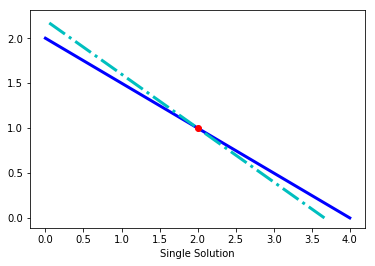

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([4,0],[0,2],'b',linewidth=3)
plt.plot([3.6667,0],[0,2.2],'c-.',linewidth=3)

plt.plot([2],[1],'ro',linewidth=3)
plt.xlabel('Single Solution')
plt.show()

### Case 2 - Infinite Solutions
The second case is when there are infinite values that the scalars could have taken because at least two of the equations are redundant. In our case, our only two equations are redundant and they represent the same line (see graph below). 

This second case is represented by $vw2$ and $t2$ where:
    
$\hspace{1cm} \begin{array}{rcl} x + 2y & = & 6 \\ 2x + 4y  & = & 12 \end{array}$, where **infinite** $x$ and $y$ makes this *__true__* because the equations are redundant. 

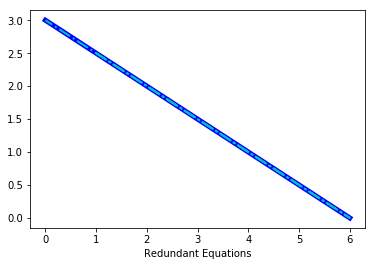

In [ ]:
import matplotlib.pyplot as plt

plt.plot([6,0],[0,3],'b',linewidth=5)
plt.plot([1,4,6,0],[2.5,1,0,3],'c-.',linewidth=2)
plt.xlabel('Redundant Equations')
plt.show()

### Case 3 - No Solution
The third case is that there are **no** values that the scalars could have taken that would have simutaneously solved all equations.
In our case, our only two equations are represented by parallel lines because they have no solution (see graph below). 

This third case is represented by $vw3$ and $t3$ where:
    
$\hspace{1cm} \begin{array}{rcl} x + 2y & = & 6 \\ x + 2y  & = & 10 \end{array}$, where **no** $x$ and $y$ make this true. 

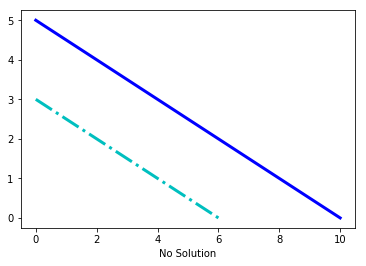

In [ ]:
import matplotlib.pyplot as plt

plt.plot([10,0],[0,5],'b',linewidth=3)
plt.plot([0,6],[3,0],'c-.',linewidth=3)
plt.xlabel('No Solution')
plt.show()

### Importance of the Lab

Understanding how to check a vector's span and how to solve a system of equations are important foundations for solving more complex problems we will work with in AI.